* MNIST hand-written digits classification

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn import svm 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import  AdaBoostClassifier 
from xgboost import XGBClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
import matplotlib.pyplot as plt

# Load data set

In [2]:
digits = load_digits()
data = digits.data
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

# EDA

In [3]:
data.shape

(1797, 64)

In [4]:
print(digits.images[0])
print(digits.target[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


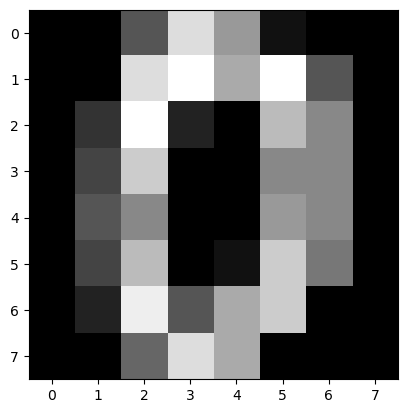

In [5]:
# plot the 1st image
plt.gray()
plt.imshow(digits.images[0])
plt.show()

# Preprocessing data set

In [6]:
# Split data set, 25% - 75%
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)
print(train_x.max())
print((train_x>1).sum())
print(train_x.shape[0]*train_x.shape[1])

16.0
40971
86208


In [7]:
# Z-Score Normalisation
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

# ML models

## Logistic regression

In [8]:
lr = LogisticRegression(solver='liblinear', multi_class='auto') 
lr.fit(train_ss_x, train_y)
predict_y=lr.predict(test_ss_x)
print('Logistic Regression Accuracy: %0.4lf' % accuracy_score(predict_y, test_y))

Logistic Regression Accuracy: 0.9600


## CART decision tree

In [9]:
model = DecisionTreeClassifier()
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('CART Accuracy: %0.4lf' %accuracy_score(predict_y,test_y))

CART Accuracy: 0.8622


## LDA

In [10]:
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('LDA Accuracy: %0.4lf' %accuracy_score(predict_y,test_y))

LDA Accuracy: 0.9378


## Naive Bayes

In [11]:
model = GaussianNB()
model.fit(train_x,train_y)
predict_y=model.predict(test_x)
print('Naive Bayes Accuracy: %0.4lf' %accuracy_score(predict_y,test_y))

Naive Bayes Accuracy: 0.8311


## SVM

In [12]:
model = svm.SVC(kernel='rbf', C=1.0, gamma='auto')
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('SVM Accuracy: %0.4lf' %accuracy_score(predict_y,test_y))

SVM Accuracy: 0.9867


## KNN

In [13]:
model = KNeighborsClassifier()
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('KNN Accuracy: %0.4lf' %accuracy_score(predict_y,test_y))

KNN Accuracy: 0.9756


## AdaBoost

In [14]:
dt_stump = DecisionTreeClassifier(max_depth=5,min_samples_leaf=1)
dt_stump.fit(train_ss_x, train_y)

n_estimators=500
model = AdaBoostClassifier(base_estimator=dt_stump,n_estimators=n_estimators)

model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('AdaBoost Accuracy: %0.4lf' %accuracy_score(predict_y,test_y))

AdaBoost Accuracy: 0.9644


## XGBoost

In [15]:
model = XGBClassifier()
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('XGBoost Accuracy: %0.4lf' %accuracy_score(predict_y,test_y))

XGBoost Accuracy: 0.9444
